In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions

In [40]:
df_locations = pd.read_csv('Data/instagram_locations.csv',sep='\t')
#df_posts = pd.read_csv('Data/instagram_posts.csv',sep='\t')
df_profiles = pd.read_csv('Data/instagram_profiles.csv',sep='\t')

In [5]:
df_locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [41]:
df_profiles.head()


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [44]:
df_profiles = df_profiles.dropna(subset = ['followers', 'following','url','n_posts']) 
df_profiles = df_profiles.drop(columns = ['description'])


In [45]:
df_profiles.head()

,sid,profile_id,profile_name,firstname_lastname,following,followers,n_posts,url,cts,is_business_account
1,4184457,5.905830e+08,mama_haas,Deanna,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
13,4184486,3.041392e+08,katepani413,kp!!!! ☆,1543.0,3008.0,115.0,vsco.co/kpani,2019-08-01 14:41:46.967 -0400,True
50,4184480,9.947274e+09,jk_vastgoed,JK VASTGOED,215.0,182.0,14.0,www.jkvastgoed.be,2019-08-01 14:41:25.930 -0400,True


In [46]:
df_profiles.dtypes

sid                      int64
profile_id             float64
profile_name            object
firstname_lastname      object
following              float64
followers              float64
n_posts                float64
url                     object
cts                     object
is_business_account     object
dtype: object

In [47]:
df_profiles = df_profiles.rename(columns = {'profile_id':'Profile ID', 'profile_name':'Profile name','firstname_lastname':'Fullname','n_posts':'Number of posts','is_business_account':'Business Account'})

In [48]:
df_profiles.shape

(870274, 10)

In [49]:
duplicate_rows_df = df_profiles[df_profiles.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [50]:
df_profiles = df_profiles.drop_duplicates()

In [51]:
df_profiles.shape

(870274, 10)

In [52]:
print(df_profiles.isnull().sum())

sid                     0
Profile ID           1237
Profile name            0
Fullname            18313
following               0
followers               0
Number of posts         0
url                     0
cts                 57315
Business Account     2737
dtype: int64


In [54]:
df_profiles.head()

,sid,Profile ID,Profile name,Fullname,following,followers,Number of posts,url,cts,Business Account
1,4184457,5.905830e+08,mama_haas,Deanna,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
13,4184486,3.041392e+08,katepani413,kp!!!! ☆,1543.0,3008.0,115.0,vsco.co/kpani,2019-08-01 14:41:46.967 -0400,True
50,4184480,9.947274e+09,jk_vastgoed,JK VASTGOED,215.0,182.0,14.0,www.jkvastgoed.be,2019-08-01 14:41:25.930 -0400,True


<AxesSubplot:xlabel='following'>

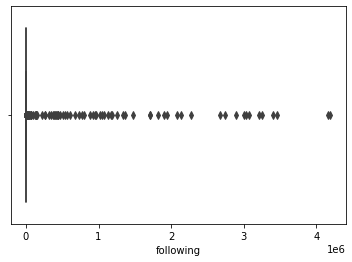

In [86]:
sns.boxplot(x=df_profiles['following'])

<AxesSubplot:xlabel='followers'>

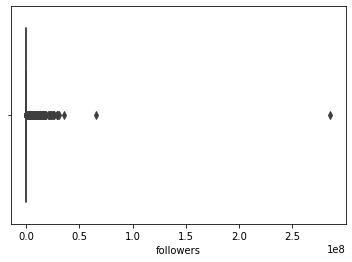

In [87]:
sns.boxplot(x=df_profiles['followers'])

<AxesSubplot:xlabel='Number of posts'>

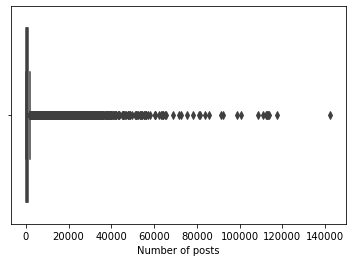

In [88]:
sns.boxplot(x=df_profiles['Number of posts'])

In [75]:
Q1 = df_profiles[['following','followers','Number of posts']].quantile(0.25)
Q3 = df_profiles[['following','followers','Number of posts']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

following          1492.0
followers          2258.0
Number of posts     677.0
dtype: float64


In [77]:
df_profiles.head()

,sid,Profile ID,Profile name,Fullname,following,followers,Number of posts,url,cts,Business Account
1,4184457,5.905830e+08,mama_haas,Deanna,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
13,4184486,3.041392e+08,katepani413,kp!!!! ☆,1543.0,3008.0,115.0,vsco.co/kpani,2019-08-01 14:41:46.967 -0400,True
50,4184480,9.947274e+09,jk_vastgoed,JK VASTGOED,215.0,182.0,14.0,www.jkvastgoed.be,2019-08-01 14:41:25.930 -0400,True


,following,followers,Number of posts
following,1.00000,0.006910,0.020380
followers,0.00691,1.000000,0.061448
Number of posts,0.02038,0.061448,1.000000


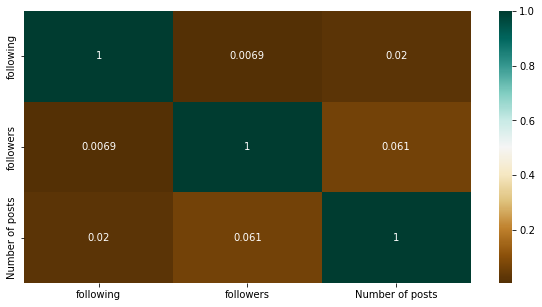

In [82]:
plt.figure(figsize=(10,5))
c= df_profiles[['following','followers','Number of posts']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

/var/folders/5b/bml_986d6rn1rxlht9v8rb4w0000gn/T/ipykernel_24667/3928458092.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_scatter = df_profiles[~((df_profiles < (Q1 - 1.5 * IQR)) |(df_profiles > (Q3 + 1.5 * IQR))).any(axis=1)]


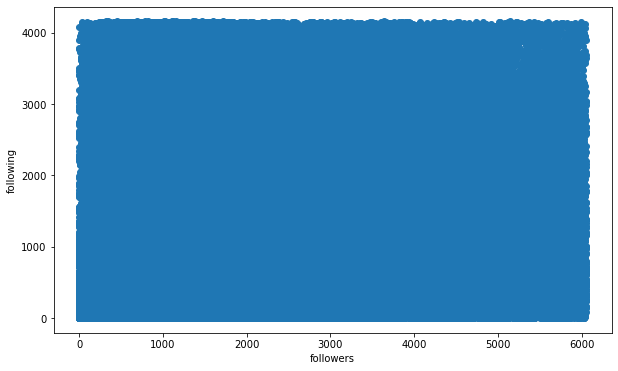

In [84]:
'''
#Adjusted the data for the scatter plot by removing outliers
df_scatter = df_profiles[~((df_profiles < (Q1 - 1.5 * IQR)) |(df_profiles > (Q3 + 1.5 * IQR))).any(axis=1)]


fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_scatter['followers'], df_scatter['following'])
ax.set_xlabel('followers')
ax.set_ylabel('following')
plt.show()
'''